In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/whats-cooking/sample_submission.csv.zip
/kaggle/input/whats-cooking/train.json.zip
/kaggle/input/whats-cooking/test.json.zip


# Importing important libraries

In [2]:
from zipfile import ZipFile
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
import seaborn as sb

# Preparing the training data set.

## Extracting the zip files

In [3]:
zip = ZipFile('/kaggle/input/whats-cooking/train.json.zip','r')
zip.extractall()
zip = ZipFile('/kaggle/input/whats-cooking/test.json.zip','r')
zip.extractall()

In [4]:
for dirname, _, filenames in os.walk('/kaggle/working'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/working/train.json
/kaggle/working/test.json
/kaggle/working/__notebook__.ipynb
/kaggle/working/__MACOSX/._train.json
/kaggle/working/__MACOSX/._test.json


## Loading dataset into memory.

In [5]:
feed = pd.read_json('/kaggle/working/train.json')
feed

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


## Extracting the different types of ingredients and cuisines.

In [6]:
ingre=set()

for i in feed['ingredients']:
    for j in i:
        if j in ingre:
            pass
        else:
            ingre.add(j)
print ("Number of Ingredients :" + str(len(ingre)))

cus= set()
for i in feed['cuisine']:
    if i in cus:
        pass
    else:
        cus.add(i)
print ("Number of Cuisines :"+str(len(cus)))

Number of Ingredients :6714
Number of Cuisines :20


Our data set consists of 20 different cuisines made from 6714 different ingredients

## Plotting the counts of various cuisines.

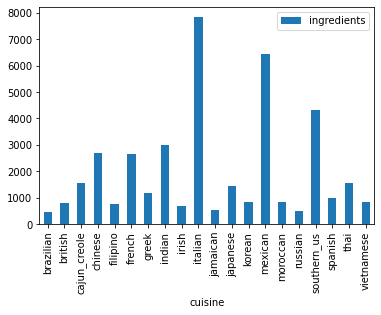

In [7]:
feed.drop('id',axis = 1).groupby('cuisine').count().plot(kind='bar')

## Implementing one hot endcoding for the all the ingredients

In [8]:
ingre = sorted(ingre)
ingre

['(    oz.) tomato sauce',
 '(   oz.) tomato paste',
 '(10 oz.) frozen chopped spinach',
 '(10 oz.) frozen chopped spinach, thawed and squeezed dry',
 '(14 oz.) sweetened condensed milk',
 '(14.5 oz.) diced tomatoes',
 '(15 oz.) refried beans',
 '1% low-fat buttermilk',
 '1% low-fat chocolate milk',
 '1% low-fat cottage cheese',
 '1% low-fat milk',
 '2 1/2 to 3 lb. chicken, cut into serving pieces',
 '2% low fat cheddar chees',
 '2% low-fat cottage cheese',
 '2% lowfat greek yogurt',
 '2% milk shredded mozzarella cheese',
 '2% reduced-fat milk',
 '25% less sodium chicken broth',
 '33% less sodium cooked deli ham',
 '33% less sodium cooked ham',
 '33% less sodium ham',
 '33% less sodium smoked fully cooked ham',
 '40% less sodium taco seasoning',
 '40% less sodium taco seasoning mix',
 '7 Up',
 '8 ounc ziti pasta, cook and drain',
 '95% lean ground beef',
 'A Taste of Thai Rice Noodles',
 'Accent Seasoning',
 'Adobo All Purpose Seasoning',
 'Alaskan king crab legs',
 'Alexia Waffle Frie

In [9]:
columns = list(ingre)

for i in columns:
    tem =[ ]
    for j in feed['ingredients']:
        if i in j:
            tem.append(1)
        else:
            tem.append(0)
    feed[i] = tem
feed.head()

,id,cuisine,ingredients,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,"[water, vegetable oil, wheat, salt]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
feed.head()

,id,cuisine,ingredients,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,"[water, vegetable oil, wheat, salt]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
feed.columns

Index(['id', 'cuisine', 'ingredients', '(    oz.) tomato sauce',
       '(   oz.) tomato paste', '(10 oz.) frozen chopped spinach',
       '(10 oz.) frozen chopped spinach, thawed and squeezed dry',
       '(14 oz.) sweetened condensed milk', '(14.5 oz.) diced tomatoes',
       '(15 oz.) refried beans',
       ...
       'yukon gold potatoes', 'yuzu', 'yuzu juice', 'za'atar', 'zest',
       'zesty italian dressing', 'zinfandel', 'ziti', 'zucchini',
       'zucchini blossoms'],
      dtype='object', length=6717)

# Preparing Training and Testing datasets.

In [12]:
feed = feed.drop(['id','ingredients'],axis = 1)
feed.head()

,cuisine,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,1% low-fat chocolate milk,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
0,greek,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,southern_us,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,filipino,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df_train_x = feed.drop('cuisine',axis = 1)
df_train_y = feed[['cuisine']]

## Converting cuisines to numbers as some models require numbers like decision trees.

In [14]:
a=[]
cuisine = list(cus)
for i in df_train_y.cuisine:
    a.append(cuisine.index(i))
df_train_y['cuisine'] = a
df_train_y.describe()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,cuisine
count,39774.000000
mean,10.639438
std,5.942039
min,0.000000
25%,6.000000
50%,11.000000
75%,17.000000
max,19.000000


In [15]:
df_train_y.describe

<bound method NDFrame.describe of        cuisine
0            8
1           11
2            2
3           17
4           17
...        ...
39769       10
39770        6
39771       10
39772        3
39773       19

[39774 rows x 1 columns]>

## Machine learning Model

### Performing train test split. 

In [16]:
x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.15, random_state=42)

### Comparing accuracies of different models.

In [17]:
acc = []
dt = DecisionTreeRegressor().fit(x_train,y_train)
prediction = dt.predict(x_test)
y_test['output'] = prediction

accuracy = 0
y_test['equal'] = np.where(y_test['cuisine']==y_test['output'],1,0)
for i in y_test.equal:
    accuracy +=i
accuracy = (accuracy/5967)*100
acc.append((accuracy))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [18]:
gauss = GaussianNB().fit(x_train,y_train)
prediction = gauss.predict(x_test)
y_test['output'] = prediction

accuracy = 0
y_test['equal'] = np.where(y_test['cuisine']==y_test['output'],1,0)
for i in y_test.equal:
    accuracy +=i
accuracy = (accuracy/5967)*100
acc.append((accuracy))

/opt/conda/lib/python3.6/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [19]:
acc

[58.68945868945868, 36.299648064353946]

We can see that the decison tree model works kmuch better compared to the Gaussian classifier so we use the decision tree.

In [20]:
y_test.describe

<bound method NDFrame.describe of        cuisine  output  equal
21513        3       4      0
1796         9       9      1
21861        8       8      1
26571       17       5      0
28720        6       1      0
...        ...     ...    ...
37940        5       5      1
6133         8       8      1
32204       19      19      1
7616        12      13      0
18278       11       0      0

[5967 rows x 3 columns]>

### Retraining over the whole data set.

In [21]:
dt = DecisionTreeRegressor().fit(df_train_x,df_train_y)

## Preparing test data. 

### One Hot encoding of test data.

In [22]:
test = pd.read_json('/kaggle/working/test.json')
columns = list(ingre)

for i in columns:
    tem =[]
    for j in test['ingredients']:
        if i in j:
            tem.append(1)
        else:
            tem.append(0)
    test[i] = tem
test.head()

,id,ingredients,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
0,18009,"[baking powder, eggs, all-purpose flour, raisi...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,28583,"[sugar, egg yolks, corn starch, cream of tarta...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,41580,"[sausage links, fennel bulb, fronds, olive oil...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,29752,"[meat cuts, file powder, smoked sausage, okra,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,35687,"[ground black pepper, salt, sausage casings, l...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
test_output = test[['id']]

In [24]:
test.columns

Index(['id', 'ingredients', '(    oz.) tomato sauce', '(   oz.) tomato paste',
       '(10 oz.) frozen chopped spinach',
       '(10 oz.) frozen chopped spinach, thawed and squeezed dry',
       '(14 oz.) sweetened condensed milk', '(14.5 oz.) diced tomatoes',
       '(15 oz.) refried beans', '1% low-fat buttermilk',
       ...
       'yukon gold potatoes', 'yuzu', 'yuzu juice', 'za'atar', 'zest',
       'zesty italian dressing', 'zinfandel', 'ziti', 'zucchini',
       'zucchini blossoms'],
      dtype='object', length=6716)

In [25]:
test = test.drop(['id','ingredients'],axis=1)
test.columns

Index(['(    oz.) tomato sauce', '(   oz.) tomato paste',
       '(10 oz.) frozen chopped spinach',
       '(10 oz.) frozen chopped spinach, thawed and squeezed dry',
       '(14 oz.) sweetened condensed milk', '(14.5 oz.) diced tomatoes',
       '(15 oz.) refried beans', '1% low-fat buttermilk',
       '1% low-fat chocolate milk', '1% low-fat cottage cheese',
       ...
       'yukon gold potatoes', 'yuzu', 'yuzu juice', 'za'atar', 'zest',
       'zesty italian dressing', 'zinfandel', 'ziti', 'zucchini',
       'zucchini blossoms'],
      dtype='object', length=6714)

### Predicting values over test set.

In [26]:
predictions = dt.predict(test)

test_output['cuisine'] = predictions

test_output.describe()

,id,cuisine
count,9944.000000,9944.000000
mean,24894.350362,10.755648
std,14322.958061,5.916507
min,5.000000,0.000000
25%,12541.000000,6.000000
50%,24731.500000,11.000000
75%,37113.250000,17.000000
max,49715.000000,19.000000


In [27]:
cuisines = []
test_output.describe
for i in test_output.cuisine:
    cuisines.append(cuisine[int(i)])
test_output['cuisine'] = cuisines 

In [28]:
test_output.describe

<bound method NDFrame.describe of          id       cuisine
0     18009      japanese
1     28583   southern_us
2     41580       italian
3     29752  cajun_creole
4     35687       italian
...     ...           ...
9939  30246        french
9940  36028       mexican
9941  22339        french
9942  42525   southern_us
9943   1443       mexican

[9944 rows x 2 columns]>

## Exporting output to csv

In [29]:
test_output.to_csv('submission.csv',index=False)